# Линейные модели, SVM и деревья решений.

### Описание датасета

Датасет качества вина. Выбран, потому что решает задачи классификации.

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn import utils

ds = datasets.load_iris()
ds.data[:5]
np.unique(ds.target)
iris_df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= ds['feature_names'] + ['target'])
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


В датасете нет пустых элементов

### С использованием метода train_test_split разделите выборку на обучающую и тестовую.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    ds.data, ds.target, test_size=0.5, random_state=1)

Размер обучающей модели

In [3]:
X_train.shape, y_train.shape

((75, 4), (75,))

Размер тестовой выборки

In [4]:
X_test.shape, y_test.shape

((75, 4), (75,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.

In [5]:
np.unique(y_train)
np.unique(y_test)

array([0, 1, 2])

In [6]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    labels, counts = np.unique(array, return_counts=True)
    counts_perc = counts/array.size
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

В исходной выборке нет явного дисбаланса классов для целевого признака

In [7]:
print_class_proportions(ds.target)

Метка 	 Количество 	 Процент встречаемости
0 	 50 	 	 33.33%
1 	 50 	 	 33.33%
2 	 50 	 	 33.33%


Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились пропорции классов.

In [8]:
print_class_proportions(y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 26 	 	 34.67%
1 	 26 	 	 34.67%
2 	 23 	 	 30.67%


Для обучающей выборки

In [9]:
print_class_proportions(y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 24 	 	 32.0%
1 	 24 	 	 32.0%
2 	 27 	 	 36.0%


Для тестовой выборки

In [10]:
lab = preprocessing.LabelEncoder()
cl1_1 = KNeighborsClassifier(n_neighbors=2)
y_transformed = lab.fit_transform(y_train)
cl1_1.fit(X_train, y_transformed)
target1_1 = cl1_1.predict(X_test)
len(target1_1), target1_1

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2,
        0, 1, 2, 1, 1, 2, 1, 0, 1]))

2 ближайших соседа

In [11]:
lab = preprocessing.LabelEncoder()
cl1_1 = KNeighborsClassifier(n_neighbors=10)
y_transformed = lab.fit_transform(y_train)
cl1_1.fit(X_train, y_transformed)
target1_2 = cl1_1.predict(X_test)
len(target1_2), target1_2

(75,
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
        1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2,
        0, 2, 2, 1, 1, 2, 2, 0, 1]))

10 ближайших соседей

## Обучить одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);

Построим корреляционную матрицу

<AxesSubplot:>

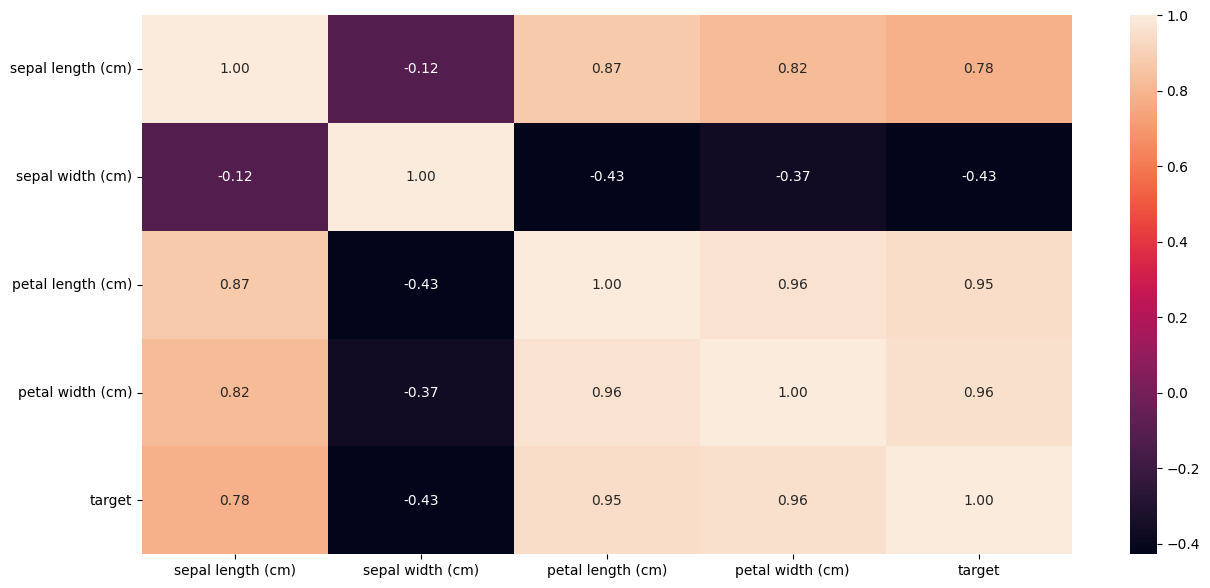

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(iris_df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

/var/folders/k2/sflz85vs63j4gxgb780kr_hr0000gn/T/ipykernel_29438/220640260.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y = np.where(y == 'Iris-setosa', 0, 1)


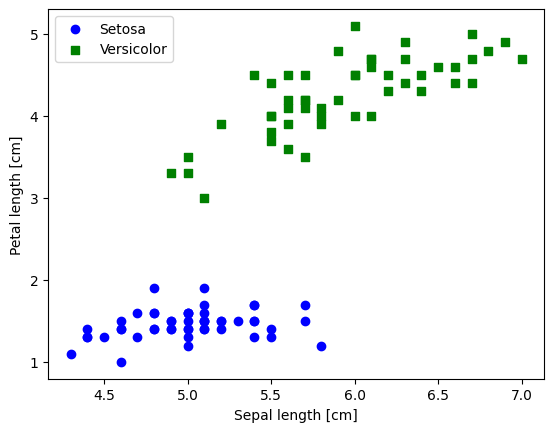

In [13]:
y = iris_df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
 

X = iris_df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='blue', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='green', marker='s', label='Versicolor')
 
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

## Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

### Accuracy

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов.

Эту метрику обычно переводят как "точность", но перевод не является удачным, потому что совпадает с переводом для другой метрики - "precision".

Чтобы не сталкиваться с неточностями перевода, названия метрик можно не переводить.

In [14]:
# 2 ближайших соседа
accuracy_score(y_test, target1_1)

0.92

In [15]:
# 10 ближайших соседей
accuracy_score(y_test, target1_2)

0.9733333333333334

Точность в случае 10 ближайших соседей составляет 97%, а точность в случае 2 ближайших соседей составляет 92%.

Метрика "Accuracy" показывает точность по всем классам, но точность может быть различной для различных классов.

Это очень серьезная проблема, которая часто возникает на несбалансированных выборках.

In [16]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [17]:
# 2 ближайших соседа
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7777777777777778


In [18]:
# 10 ближайших соседей
print_accuracy_score_for_classes(y_test, target1_2)

Метка 	 Accuracy
0 	 1.0
1 	 0.9583333333333334
2 	 0.9629629629629629


In [19]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [20]:
bin_iris_y_train = convert_target_to_binary(y_train, 2)
list(zip(y_train, bin_iris_y_train))[:10]

[(1, 0),
 (2, 1),
 (1, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 1),
 (0, 0)]

In [21]:
bin_iris_y_test = convert_target_to_binary(y_test, 2)
list(zip(y_train, bin_iris_y_test))[:10]

[(1, 0),
 (2, 0),
 (1, 0),
 (2, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (2, 0),
 (0, 1)]

In [22]:
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)

In [23]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_1)

0.8888888888888888

In [24]:
balanced_accuracy_score(bin_iris_y_test, bin_target1_2)

0.9710648148148148

Метрика Accuracy интуитивно понятна и часто используется на практике. Но если количество классов относительно невелико, то лучше всего вычислять Accuracy отдельно для каждого класса.

### Precision, recall и F-мера

In [25]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_1), recall_score(bin_iris_y_test, bin_target1_1)

(1.0, 0.7777777777777778)

In [26]:
# Для 10 ближайших соседей
precision_score(bin_iris_y_test, bin_target1_2), recall_score(bin_iris_y_test, bin_target1_2)

(0.9629629629629629, 0.9629629629629629)

Параметр average (уровень детализации метрик) описан в документации к функциям. Рассмотрим данный параметр на примере

In [27]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(y_test, target1_1, average='micro')

0.92

In [28]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(y_test, target1_1, average='macro')

0.9333333333333332

In [29]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(y_test, target1_1, average='weighted')

0.936

In [30]:
f1_score(bin_iris_y_test, bin_target1_2)

0.9629629629629629

In [31]:
f1_score(y_test, target1_1, average='micro')

0.92

In [32]:
f1_score(y_test, target1_1, average='macro')

0.9212962962962963

In [33]:
f1_score(y_test, target1_1, average='weighted')

0.9194444444444446

Функция classification_report позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [34]:
classification_report(y_test, target1_1, 
                      target_names=ds.target_names, output_dict=True)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24},
 'versicolor': {'precision': 0.8,
  'recall': 1.0,
  'f1-score': 0.888888888888889,
  'support': 24},
 'virginica': {'precision': 1.0,
  'recall': 0.7777777777777778,
  'f1-score': 0.8750000000000001,
  'support': 27},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.9333333333333332,
  'recall': 0.9259259259259259,
  'f1-score': 0.9212962962962963,
  'support': 75},
 'weighted avg': {'precision': 0.936,
  'recall': 0.92,
  'f1-score': 0.9194444444444446,
  'support': 75}}

## Постройте график, показывающий важность признаков в дереве решений.

С помощью свойства feature_importances_ можно получить значение важности признаков.

Вычисление важности признаков основано на том, какое количество раз признак встречается в условиях дерева. Чем чаще встречается признак, тем более он важен.

In [35]:
def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()    
    

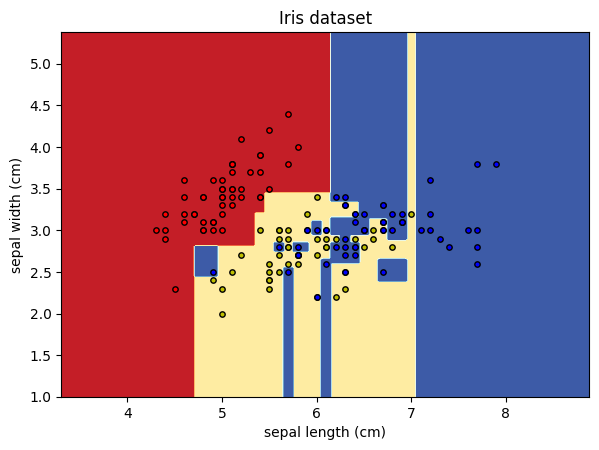

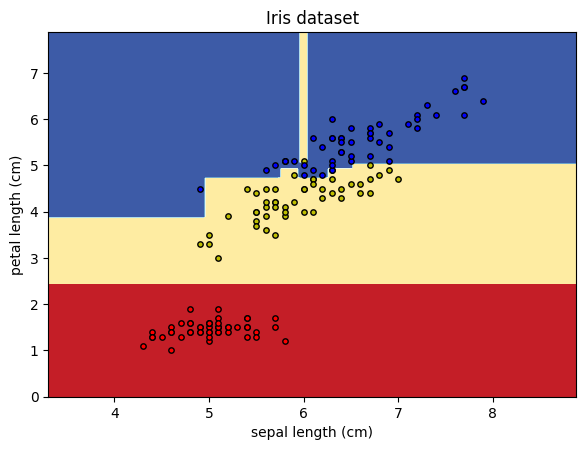

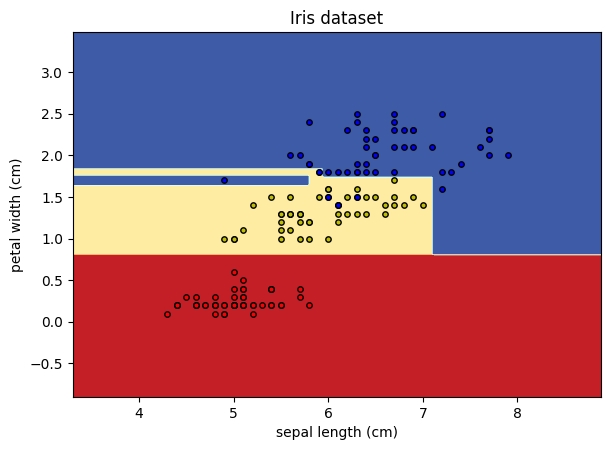

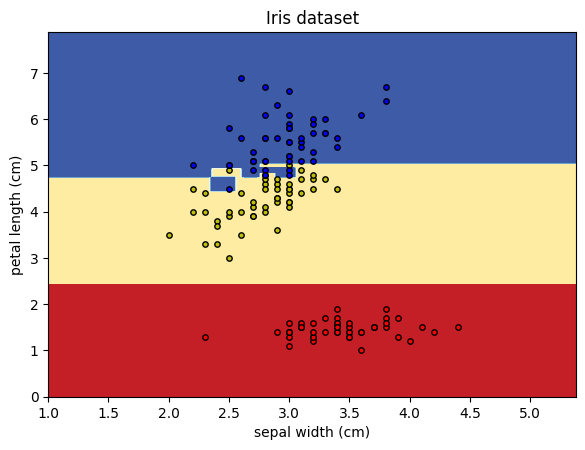

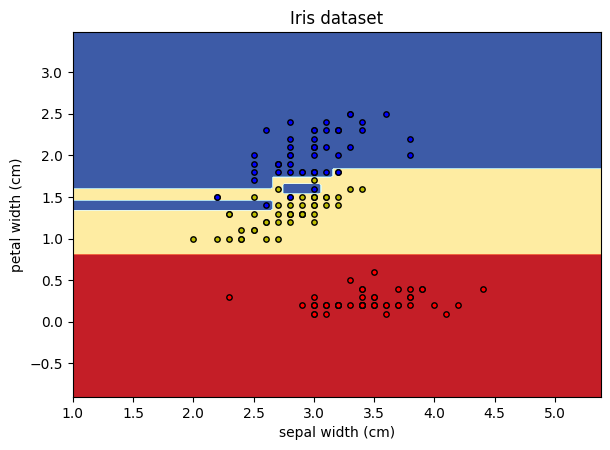

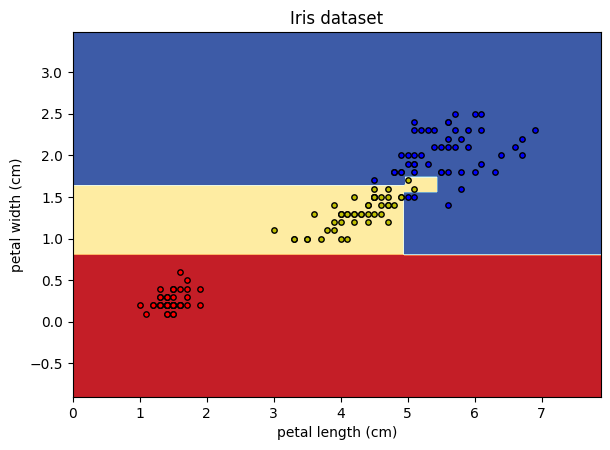

In [36]:
plot_tree_classification('Iris dataset', ds)

In [37]:
iris_tree_cl = DecisionTreeClassifier(random_state=1)
iris_tree_cl.fit(iris_df, ds.target)
iris_tree_cl

DecisionTreeClassifier(random_state=1)

In [38]:
list(zip(iris_df.columns.values, iris_tree_cl.feature_importances_))

[('sepal length (cm)', 0.0),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.5000000000000001),
 ('petal width (cm)', 0.0),
 ('target', 0.49999999999999994)]

In [39]:
#  Важность признаков в сумме дает единицу
sum(iris_tree_cl.feature_importances_)

1.0

In [40]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

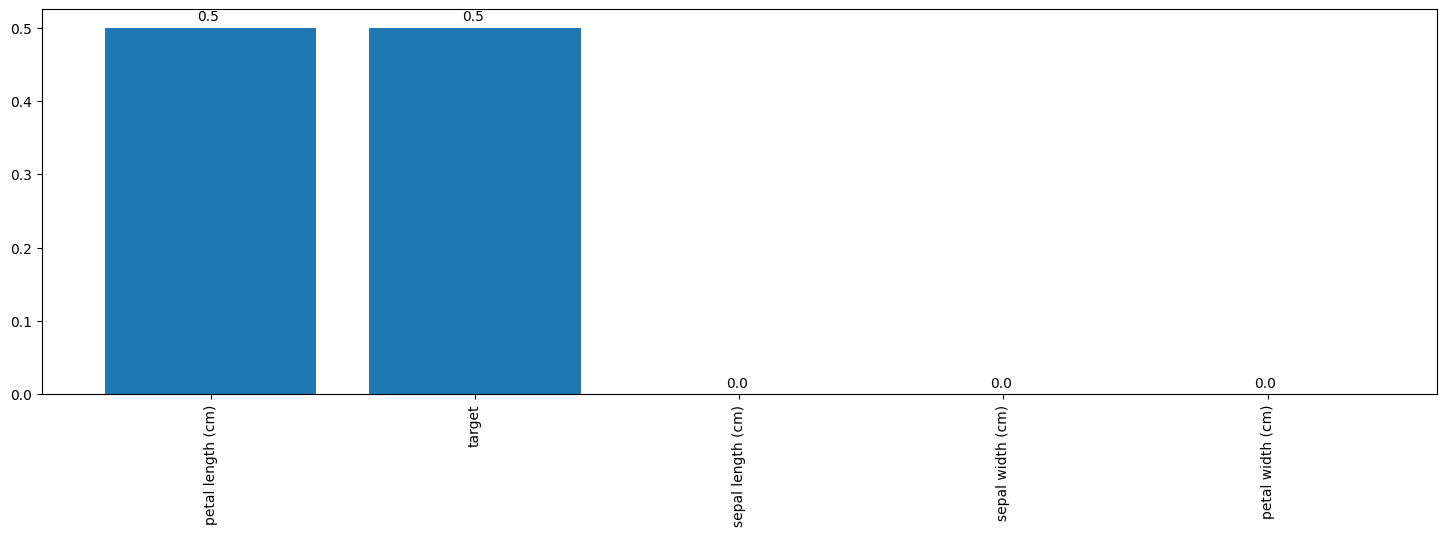

In [41]:
iris_tree_cl_fl, iris_tree_cl_fd = draw_feature_importances(iris_tree_cl, iris_df)

In [42]:
iris_tree_cl_fl, iris_tree_cl_fd

(['petal length (cm)',
  'target',
  'sepal length (cm)',
  'sepal width (cm)',
  'petal width (cm)'],
 [0.5000000000000001, 0.49999999999999994, 0.0, 0.0, 0.0])

In [43]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [44]:
# Пересортируем признаки на основе важности
iris_x_ds_sorted = iris_df[iris_tree_cl_fl]
iris_x_ds_sorted.head()

,petal length (cm),target,sepal length (cm),sepal width (cm),petal width (cm)
0,1.4,0.0,5.1,3.5,0.2
1,1.4,0.0,4.9,3.0,0.2
2,1.3,0.0,4.7,3.2,0.2
3,1.5,0.0,4.6,3.1,0.2
4,1.4,0.0,5.0,3.6,0.2


In [45]:
# Разделим выборку на обучающую и тестовую
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_x_ds_sorted, ds.target, test_size=0.5, random_state=1)
iris_X_train.shape, iris_X_test.shape

((75, 5), (75, 5))

In [46]:
# Обучим дерево и предскажем результаты на всех признаках 
iris_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(iris_X_train, iris_y_train)
iris_y_test_predict = iris_tree_cl_feat_1.predict(iris_X_test)
iris_y_test_predict.shape

(75,)

In [47]:
# Проверим точность по классам
print_accuracy_score_for_classes(iris_y_test, iris_y_test_predict)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [48]:
# Обучим дерево и предскажем результаты на единственном самом важном признаке 
iris_tree_cl_feat_2 = DecisionTreeClassifier(random_state=1).fit(iris_X_train[[iris_tree_cl_fl[0]]], iris_y_train)
iris_y_test_predict_2 = iris_tree_cl_feat_2.predict(iris_X_test[[iris_tree_cl_fl[0]]])
iris_y_test_predict_2.shape

(75,)

In [49]:
# Проверим точность по классам
print_accuracy_score_for_classes(iris_y_test, iris_y_test_predict_2)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 0.7407407407407407


## Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [50]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(iris_tree_cl, feature_names=list(iris_df.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [51]:
iris_tree_cl = DecisionTreeClassifier(random_state=1)
iris_tree_cl.fit(iris_df, ds.target)
dot_data = export_graphviz(iris_tree_cl, out_file=None, 
                           feature_names=ds.feature_names, 
                           class_names=ds.target_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ValueError: Length of feature_names, 4 does not match number of features, 5